# Import packeges

In [1]:
import pandas, numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import itertools

# Data reading

In [2]:
# read excel file with pandas
train_data = pd.read_excel("4.xlsx")
train_data[:3]

,Disease,Drug,sub1,sub2,sub3,sub4,sub5,sub6,sub7,sub8,...,hsa-mir-7-1,hsa-mir-7-2,hsa-mir-7-3,hsa-mir-708,hsa-mir-765,hsa-mir-9-1,hsa-mir-9-2,hsa-mir-9-3,hsa-mir-92a-1,hsa-mir-96
0,acute lymphoblastic leukemia (all) (precursor ...,methotrexate,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,acute lymphoblastic leukemia (all) (precursor ...,prednisone,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,acute lymphoblastic leukemia (all) (precursor ...,nelarabine,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
len(train_data)

638

In [4]:
# display names of columns
col = train_data.columns
col

Index([      u'Disease',          u'Drug',          u'sub1',          u'sub2',
                u'sub3',          u'sub4',          u'sub5',          u'sub6',
                u'sub7',          u'sub8', 
       ...
         u'hsa-mir-7-1',   u'hsa-mir-7-2',   u'hsa-mir-7-3',   u'hsa-mir-708',
         u'hsa-mir-765',   u'hsa-mir-9-1',   u'hsa-mir-9-2',   u'hsa-mir-9-3',
       u'hsa-mir-92a-1',    u'hsa-mir-96'],
      dtype='object', length=4047)

In [5]:
# display number of columns
len(col)

4047

In [6]:
# delete columns  with only 0 values
train_data = train_data.loc[:, (train_data != 0).any(axis=0)]
train_data[:3]

,Disease,Drug,sub1,sub2,sub3,sub4,sub10,sub11,sub12,sub13,...,hsa-mir-630,hsa-mir-7-1,hsa-mir-7-2,hsa-mir-7-3,hsa-mir-765,hsa-mir-9-1,hsa-mir-9-2,hsa-mir-9-3,hsa-mir-92a-1,hsa-mir-96
0,acute lymphoblastic leukemia (all) (precursor ...,methotrexate,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,acute lymphoblastic leukemia (all) (precursor ...,prednisone,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,acute lymphoblastic leukemia (all) (precursor ...,nelarabine,1,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# display number of columns
col = train_data.columns
len(col)

1649

# Extract Train and Test data 

In [8]:
# randomly select 200 rows for testing
random_index = random.sample(train_data.index, 200)
train_data_200 = train_data.ix[random_index]
train_data_200.index = range(len(train_data_200))
train_data_200[:10]

,Disease,Drug,sub1,sub2,sub3,sub4,sub10,sub11,sub12,sub13,...,hsa-mir-630,hsa-mir-7-1,hsa-mir-7-2,hsa-mir-7-3,hsa-mir-765,hsa-mir-9-1,hsa-mir-9-2,hsa-mir-9-3,hsa-mir-92a-1,hsa-mir-96
0,small cell lung cancer,etoposide,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,gastric cancer,porfimer sodium,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,graft-versus-host disease,tacrolimus,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,multiple myeloma,dexamethasone,1,1,1,0,1,1,1,1,...,0,0,0,0,0,1,1,1,0,0
4,gastric cancer,docetaxel,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,multiple myeloma,dexamethasone,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,osteosarcoma,methotrexate,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
7,penile cancer,methotrexate,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8,ovarian cancer,docetaxel,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
9,asthma,terbutaline,1,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
len(train_data_200)

200

In [10]:
train_data_400 = train_data.drop(random_index)
train_data_400.index = range(len(train_data_400))
len(train_data_400)

438

In [11]:
X_train = train_data_400[col[2:]].values
X_train

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ..., 
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
X_test = train_data_200[col[2:]].values
X_test

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ..., 
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int64)

# One Class SVM model building and evaluation with all features

In [13]:
a = 0.0
p = []
for t in [0.0001, 0.001, 0.01, 0.1, 1, 10]: 
    for k in ['linear', 'poly', 'rbf', 'sigmoid']:
        for g in [0.0001, 0.001, 0.01, 0.1, 1]:
            #print (t,k,g)
            clf = svm.OneClassSVM(tol=t, nu=0.1, kernel=k, gamma=g, verbose=0, 
                                                          random_state=0)
            clf.fit(X_train)
            y_pred_train = clf.predict(X_train)
            y_pred_test = clf.predict(X_test)
            n_error_train = y_pred_train[y_pred_train == 1].size
            n_error_test = y_pred_test[y_pred_test == 1].size
            #print float(n_error_train)/float(len(X_train)), float(n_error_test)/float(len(X_test))
            if float(n_error_test)/float(len(X_test)) > a:
                a = float(n_error_test)/float(len(X_test))
                p.append((t,k,g))
print 'Test Accuracy = ', a
print 'Best parameters ', p[len(p)-1]

Test Accuracy =  0.915
Best parameters  (0.1, 'rbf', 0.0001)


# One Class SVM model with PCA for dimensionaly reduction (100)

In [14]:
# use PCA algorithm for features selection
nf = 100
pca = PCA(n_components=nf)

# X is the matrix transposed (n samples on the rows, m features on the columns)
pca.fit(X_train)

X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)


In [15]:
X_train_PCA_df = pd.DataFrame(X_train_PCA)
X_train_PCA_df.loc[:, 'Disease'] = train_data_400.loc[:, 'Disease']
X_train_PCA_df.loc[:, 'Drug'] = train_data_400.loc[:, 'Drug']
X_train_PCA_df.to_csv('Train_data_PCA_100.csv', index = False)
X_train_PCA_df[:3]

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,Disease,Drug
0,-6.698025,2.391524,-9.615628,-2.002385,2.431499,-2.330994,1.547073,-0.116637,0.742619,-0.071095,...,-0.050494,-0.055829,-0.082458,-0.012251,0.024219,0.044690,0.019774,0.041258,acute lymphoblastic leukemia (all) (precursor ...,methotrexate
1,-3.420315,-0.468902,6.185272,-3.832894,1.681714,-0.453725,4.216323,-4.586505,1.385514,2.431687,...,-0.005648,-0.032345,-0.026439,-0.012835,0.055785,-0.063319,-0.017825,-0.012310,acute lymphoblastic leukemia (all) (precursor ...,prednisone
2,-5.802015,1.214334,0.085104,-0.261295,-0.293390,-0.149495,-1.215243,-1.978630,-4.282841,-3.902849,...,-0.009269,-0.003281,-0.023524,0.018771,-0.007815,0.006280,0.002910,0.000363,acute lymphoblastic leukemia (all) (precursor ...,nelarabine


In [16]:
X_test_PCA_df = pd.DataFrame(X_test_PCA)
X_test_PCA_df.loc[:, 'Disease'] = train_data_200.loc[:, 'Disease']
X_test_PCA_df.loc[:, 'Drug'] = train_data_200.loc[:, 'Drug']
X_test_PCA_df.to_csv('Test_data_PCA_100.csv', index = False)
X_test_PCA_df[:3]

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,Disease,Drug
0,-4.319467,-1.246710,-3.299837,3.039322,-3.147113,1.088172,-2.749475,0.730690,-0.922827,3.735576,...,0.249534,-0.031280,-0.331996,-0.196817,-0.082163,-0.033754,0.392871,0.067687,prostate cancer,leuprolide acetate
1,-3.409597,-0.475780,6.207070,-3.678270,1.612942,-0.419029,4.150410,-4.501029,1.086045,2.367467,...,0.117330,0.013650,0.383925,-0.196931,-0.072890,-0.305728,0.008034,-0.042797,multiple myeloma,prednisone
2,8.185430,3.154125,-0.954982,-0.700788,-2.284911,-1.203156,0.016237,-0.463175,0.218762,-0.123931,...,0.262328,0.390938,0.032124,0.271125,-0.502771,-0.072684,-0.013616,-0.018759,laryngeal cancer,docetaxel


In [17]:
X_train_PCA

array([[ -6.69802468e+00,   2.39152446e+00,  -9.61562786e+00, ...,
          4.46904925e-02,   1.97743040e-02,   4.12580006e-02],
       [ -3.42031528e+00,  -4.68901644e-01,   6.18527195e+00, ...,
         -6.33193330e-02,  -1.78245961e-02,  -1.23100506e-02],
       [ -5.80201487e+00,   1.21433381e+00,   8.51040938e-02, ...,
          6.27951044e-03,   2.91042791e-03,   3.63451459e-04],
       ..., 
       [ -5.66158685e+00,   1.32246669e+00,   2.22577022e+00, ...,
          1.63883104e-02,  -5.69330805e-03,   3.48456842e-03],
       [ -2.86870431e+00,  -3.44666312e-01,   3.10637062e+00, ...,
          1.27721825e-02,  -3.93825705e-03,   7.72479272e-04],
       [ -5.32952299e+00,   1.37612112e+00,   1.93338437e+00, ...,
          1.13690034e-02,   5.99938668e-03,   5.67828842e-03]])

In [18]:
a = 0.0
p = []
for t in [0.0001, 0.001, 0.01, 0.1, 1, 10]: 
    for k in ['linear', 'poly', 'rbf', 'sigmoid']:
        for g in [0.0001, 0.001, 0.01, 0.1, 1]:
            #print (t,k,g)
            clf = svm.OneClassSVM(tol=t, nu=0.1, kernel=k, gamma=g, verbose=0, 
                                                          random_state=0)
            clf.fit(X_train_PCA)
            y_pred_train = clf.predict(X_train_PCA)
            y_pred_test = clf.predict(X_test_PCA)
            n_error_train = y_pred_train[y_pred_train == 1].size
            n_error_test = y_pred_test[y_pred_test == 1].size
            #print float(n_error_train)/float(len(X_train)), float(n_error_test)/float(len(X_test))
            if float(n_error_test)/float(len(X_test)) > a:
                a = float(n_error_test)/float(len(X_test))
                p.append((t,k,g))
print 'Test Accuracy = ', a
print 'Best parameters ', p[len(p)-1]

Test Accuracy =  0.935
Best parameters  (0.001, 'sigmoid', 1)


# One Class SVM model with PCA for dimensionaly reduction (20)

In [19]:
# use PCA algorithm for features selection
nf = 20
pca = PCA(n_components=nf)

# X is the matrix transposed (n samples on the rows, m features on the columns)
pca.fit(X_train)

X_train_PCA_20 = pca.transform(X_train)
X_test_PCA_20 = pca.transform(X_test)

In [20]:
X_train_PCA_df = pd.DataFrame(X_train_PCA_20)
X_train_PCA_df.loc[:, 'Disease'] = train_data_400.loc[:, 'Disease']
X_train_PCA_df.loc[:, 'Drug'] = train_data_400.loc[:, 'Drug']
X_train_PCA_df.to_csv('Train_data_PCA_20.csv', index = False)
X_train_PCA_df[:3]

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,Disease,Drug
0,-6.698025,2.391524,-9.615628,-2.002385,2.431499,-2.330994,1.547073,-0.116637,0.742619,-0.071095,...,0.244737,-0.120313,0.385974,-0.258764,0.058189,-0.155909,0.122753,-0.271748,acute lymphoblastic leukemia (all) (precursor ...,methotrexate
1,-3.420315,-0.468902,6.185272,-3.832894,1.681714,-0.453725,4.216323,-4.586505,1.385514,2.431687,...,-0.085223,-0.344638,-0.531642,0.595183,0.130968,-0.913925,0.111001,-0.489679,acute lymphoblastic leukemia (all) (precursor ...,prednisone
2,-5.802015,1.214334,0.085104,-0.261295,-0.293390,-0.149495,-1.215243,-1.978630,-4.282841,-3.902849,...,1.194515,-0.576332,-1.274383,0.434862,-1.036879,0.166214,0.423564,0.263158,acute lymphoblastic leukemia (all) (precursor ...,nelarabine


In [21]:
X_test_PCA_df = pd.DataFrame(X_test_PCA_20)
X_test_PCA_df.loc[:, 'Disease'] = train_data_200.loc[:, 'Disease']
X_test_PCA_df.loc[:, 'Drug'] = train_data_200.loc[:, 'Drug']
X_test_PCA_df.to_csv('Test_data_PCA_20.csv', index = False)
X_test_PCA_df[:3]

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,Disease,Drug
0,-4.319467,-1.246710,-3.299837,3.039322,-3.147113,1.088172,-2.749475,0.730690,-0.922827,3.735576,...,2.725981,2.401919,-5.969732,3.415331,-4.433177,2.124997,-2.846926,-0.191982,prostate cancer,leuprolide acetate
1,-3.409597,-0.475780,6.207070,-3.678270,1.612942,-0.419029,4.150410,-4.501029,1.086045,2.367467,...,-0.146459,-0.546154,-0.396543,0.822740,-0.077002,-1.150408,0.175791,-0.202921,multiple myeloma,prednisone
2,8.185430,3.154125,-0.954982,-0.700788,-2.284911,-1.203156,0.016237,-0.463175,0.218762,-0.123931,...,-0.078709,-0.017828,-0.115648,0.030242,0.086540,0.033465,0.049809,-0.088340,laryngeal cancer,docetaxel


In [22]:
a = 0.0
p = []
for t in [0.0001, 0.001, 0.01, 0.1, 1, 10]: 
    for k in ['linear', 'poly', 'rbf', 'sigmoid']:
        for g in [0.0001, 0.001, 0.01, 0.1, 1]:
            #print (t,k,g)
            clf = svm.OneClassSVM(tol=t, nu=0.1, kernel=k, gamma=g, verbose=0, 
                                                          random_state=0)
            clf.fit(X_train_PCA_20)
            y_pred_train = clf.predict(X_train_PCA_20)
            y_pred_test = clf.predict(X_test_PCA_20)
            n_error_train = y_pred_train[y_pred_train == 1].size
            n_error_test = y_pred_test[y_pred_test == 1].size
            #print float(n_error_train)/float(len(X_train)), float(n_error_test)/float(len(X_test))
            if float(n_error_test)/float(len(X_test)) > a:
                a = float(n_error_test)/float(len(X_test))
                p.append((t,k,g))
print 'Test Accuracy = ', a
print 'Best parameters ', p[len(p)-1]

Test Accuracy =  0.985
Best parameters  (10, 'sigmoid', 1)


# Features importance for dimentionaly reduction

In [14]:
features = col[2:]
features

Index([         u'sub1',          u'sub2',          u'sub3',          u'sub4',
               u'sub10',         u'sub11',         u'sub12',         u'sub13',
               u'sub14',         u'sub15', 
       ...
         u'hsa-mir-630',   u'hsa-mir-7-1',   u'hsa-mir-7-2',   u'hsa-mir-7-3',
         u'hsa-mir-765',   u'hsa-mir-9-1',   u'hsa-mir-9-2',   u'hsa-mir-9-3',
       u'hsa-mir-92a-1',    u'hsa-mir-96'],
      dtype='object', length=1647)

In [15]:
len(features)

1647

In [112]:
a = random.sample(list(features),len(features))
comb = list(itertools.islice(itertools.combinations(a, 20), 500000))
comb[0]

(u'elevated.blood.pressure',
 u'perirectal.abscess',
 u'sub288',
 u'sub153',
 u'cardiac.arrest',
 u'hsa-mir-338',
 u'claudication',
 u'renal.mass.NOS',
 u'sub686',
 u'myopathy',
 u'sub816',
 u'salpingitis',
 u'hyperesthesia',
 u'sclerosing.cholangitis',
 u'sub397',
 u'sub396',
 u'apnea',
 u'sub567',
 u'vasculitis',
 u'sub508')

In [113]:
a = 0.0
p = []
for i in xrange(len(comb)):
    #print i
    X_train_FS_20 = train_data_400[list(comb[i])].values
    X_test_FS_20 = train_data_200[list(comb[i])].values
    clf = svm.OneClassSVM(tol=10, nu=0.1, kernel='sigmoid', gamma=1, verbose=0, 
                                                              random_state=0)
    clf.fit(X_train_FS_20)
    y_pred_train = clf.predict(X_train_FS_20)
    y_pred_test = clf.predict(X_test_FS_20)
    n_error_train = y_pred_train[y_pred_train == 1].size
    n_error_test = y_pred_test[y_pred_test == 1].size

    if float(n_error_test)/float(len(X_test)) > a:
                a = float(n_error_test)/float(len(X_test))
                p = (i, comb[i])
print 'Test Accuracy = ', a 
print 'Best features ', p

Test Accuracy =  0.99
Best features  (38096, (u'elevated.blood.pressure', u'perirectal.abscess', u'sub288', u'sub153', u'cardiac.arrest', u'hsa-mir-338', u'claudication', u'renal.mass.NOS', u'sub686', u'myopathy', u'sub816', u'salpingitis', u'hyperesthesia', u'sclerosing.cholangitis', u'sub397', u'sub396', u'apnea', u'sub567', u'sub287', u'fever'))


In [114]:
df = train_data_400[list(comb[p[0]])]
df.to_csv('Train_data_from_Features_Selection20.csv', index = False)

#  Important features comparison

#### Load features names from 2 methods of features selection from 2-class classification problem

In [115]:
FI = pd.read_csv('Train_data_from_Features_Importances20.csv')
FI_columns = FI.columns[1:-1]
FI_columns

Index([u'hsa-mir-34b', u'ccnd1.y', u'myc', u'hsa-mir-34a', u'hsa-mir-125b-2',
       u'hsa-mir-125b-1', u'rb1.y', u'hsa-mir-16-1', u'hsa-mir-331', u'bcl2.y',
       u'hsa-mir-27a', u'hsa-let-7b', u'ptgs2.y', u'erbb2.y', u'hsa-let-7a-2',
       u'hsa-mir-195', u'hsa-mir-15a', u'hsa-mir-34c', u'hsa-let-7a-1',
       u'hsa-mir-17'],
      dtype='object')

In [116]:
FE = pd.read_csv('Train_data_from_Recursive_Feature_Elimination20.csv')
FE_columns = FE.columns[1:-1]
FE_columns

Index([u'sub422', u'ESR.increased', u'grin1', u'kcnh7', u'kcnn2', u'nos2',
       u'gstp1.y', u'lrrk2', u'met.y', u'mlh1', u'mmp2.y', u'pten',
       u'hsa-mir-155', u'hsa-mir-15a', u'hsa-mir-17', u'hsa-mir-195',
       u'hsa-mir-29b-1', u'hsa-mir-29b-2', u'hsa-mir-34b', u'hsa-mir-513a-1'],
      dtype='object')

In [117]:
FS_columns = list(p[1])
FS_columns

[u'elevated.blood.pressure',
 u'perirectal.abscess',
 u'sub288',
 u'sub153',
 u'cardiac.arrest',
 u'hsa-mir-338',
 u'claudication',
 u'renal.mass.NOS',
 u'sub686',
 u'myopathy',
 u'sub816',
 u'salpingitis',
 u'hyperesthesia',
 u'sclerosing.cholangitis',
 u'sub397',
 u'sub396',
 u'apnea',
 u'sub567',
 u'sub287',
 u'fever']

In [118]:
def unique(s):
    

    n = len(s)
    if n == 0:
        return []

   
    u = {}
    try:
        for x in s:
            u[x] = 1
    except TypeError:
        del u  # move on to the next method
    else:
        return u.keys()

   
    try:
        t = list(s)
        t.sort()
    except TypeError:
        del t  # move on to the next method
    else:
        assert n > 0
        last = t[0]
        lasti = i = 1
        while i < n:
            if t[i] != last:
                t[lasti] = last = t[i]
                lasti += 1
            i += 1
        return t[:lasti]

    # Brute force is all that's left.
    u = []
    for x in s:
        if x not in u:
            u.append(x)
    return u

In [119]:
general = []
for i in FI_columns:
    general.append(i)
for i in FE_columns:
    general.append(i)
for i in FS_columns:
    general.append(i)
    
general = unique(general)
general

['hsa-mir-15a',
 u'perirectal.abscess',
 'ccnd1.y',
 'rb1.y',
 u'sub153',
 'ESR.increased',
 u'sub567',
 u'fever',
 'sub422',
 'kcnn2',
 'ptgs2.y',
 'myc',
 'erbb2.y',
 u'sub396',
 'gstp1.y',
 'hsa-let-7b',
 u'hyperesthesia',
 'kcnh7',
 'hsa-mir-16-1',
 u'hsa-mir-338',
 'lrrk2',
 'pten',
 'hsa-mir-331',
 'hsa-mir-513a-1',
 'hsa-mir-27a',
 'hsa-mir-34a',
 'hsa-mir-34b',
 'hsa-mir-34c',
 u'elevated.blood.pressure',
 'grin1',
 u'sub397',
 u'sub816',
 'hsa-mir-125b-1',
 u'claudication',
 'bcl2.y',
 'hsa-mir-125b-2',
 u'apnea',
 'hsa-mir-17',
 u'salpingitis',
 'nos2',
 'mlh1',
 'mmp2.y',
 'hsa-mir-155',
 u'sub288',
 u'myopathy',
 u'sub287',
 u'cardiac.arrest',
 'hsa-mir-29b-1',
 'hsa-mir-29b-2',
 u'sclerosing.cholangitis',
 u'sub686',
 'met.y',
 'hsa-mir-195',
 'hsa-let-7a-2',
 u'renal.mass.NOS',
 'hsa-let-7a-1']

In [120]:
FI = []
for i in general:
    if i in FI_columns:
        FI.append(1)
    else:
        FI.append(0)
        
FE = []
for i in general:
    if i in FE_columns:
        FE.append(1)
    else:
        FE.append(0)
        
FS = []
for i in general:
    if i in FS_columns:
        FS.append(1)
    else:
        FS.append(0)

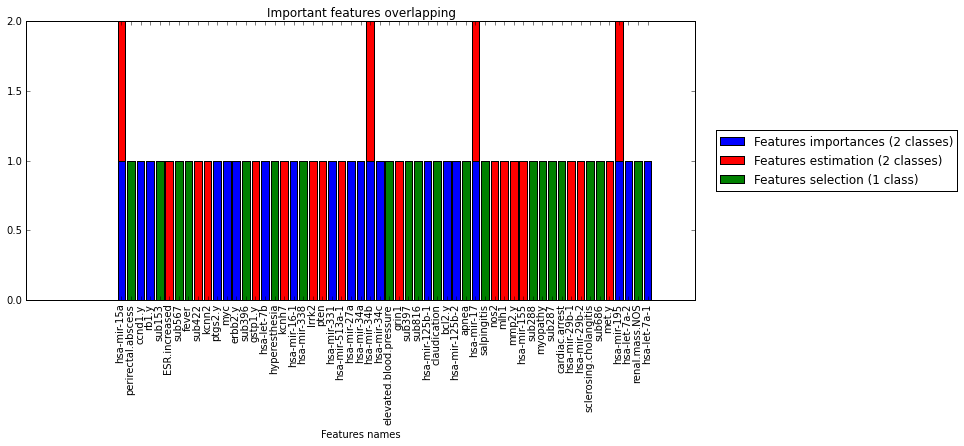

In [121]:
%matplotlib inline

plt.figure(figsize=(12,5))
X = range(len(general))
plt.title('Important features overlapping')
p1 = plt.bar(X, FI, color = 'b', align = 'center')
p2 = plt.bar(X, FE, color = 'r', bottom = FI, align = 'center')
p3 = plt.bar(X, FS, color = 'g', bottom = FE, align = 'center')
plt.xlabel('Features names')
plt.xticks(X,  general, rotation = 90)
plt.legend((p1[0], p2[0], p3[0]), ('Features importances (2 classes)', 'Features estimation (2 classes)', 'Features selection (1 class)'), loc='center right', bbox_to_anchor=(1.4, 0.5)).draggable()
plt.show()

#### Display names of features, which are in 2 lists

In [122]:
for i in xrange(len(general)):
    if FI[i] == 1 and FE[i] == 1:
        print general[i]

hsa-mir-15a
hsa-mir-34b
hsa-mir-17
hsa-mir-195


# Similarity calculating 

In [123]:
def similar(x,y):
    si = 0
    for a,b in zip(x, y):
        if a == b:
            si += 1
    return (float(si)/float(len(x))) * 100

def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)

### Between Features importances and Features Estimation

In [124]:
print 'Persent of similarity ' + str(similar(FI_columns,FE_columns)) + ' %'

Persent of similarity 5.0 %


### Between Features importances and Features Selection

In [125]:
print 'Persent of similarity ' + str(similar(FI_columns,FS_columns)) + ' %'

Persent of similarity 0.0 %


### Between Features selection and Features Estimation

In [126]:
print 'Persent of similarity ' + str(similar(FS_columns,FE_columns)) + ' %'

Persent of similarity 0.0 %
